In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/train/aligned_well_01.csv") 

In [2]:
df.head()

,DEPT,GR,RHOB,NPHI,RD
0,411.0,94.007,2.2421,0.4708,310.513
1,411.5,95.009,2.2631,0.4757,726.138
2,412.0,96.101,2.2757,0.4510,975.639
3,412.5,95.683,2.2726,0.4282,975.639
4,413.0,93.025,2.2764,0.4085,975.639


In [3]:
import sklearn

Text(0, 0.5, 'Neutron')

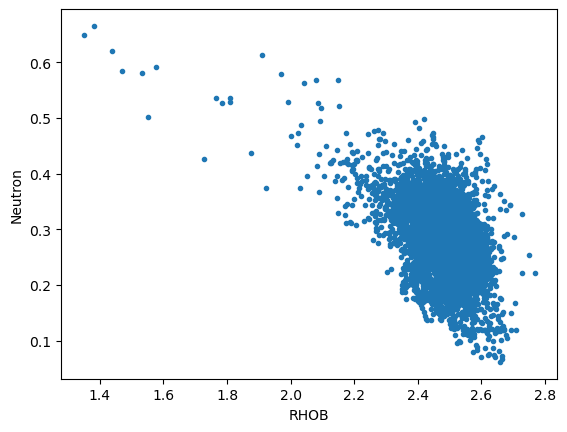

In [6]:
plt.plot(df.RHOB, df.NPHI,'.')
plt.xlabel('RHOB')
plt.ylabel('Neutron')

In [37]:
X = df.RHOB.values
y = df.NPHI.values


In [38]:
import numpy as np

In [40]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

## Preprocessing - Normalizatio/standardization

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
import seaborn as sns

In [43]:
# Instanciation 
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# fit to data
X_scaler.fit(X)
y_scaler.fit(y)

# Transform data to normalized value
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

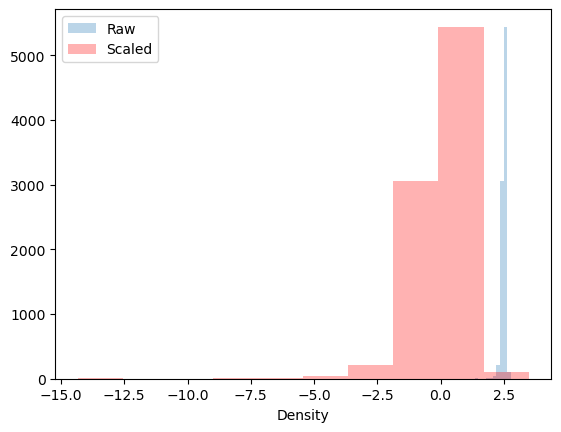

In [61]:
plt.hist(X, label = 'Raw', alpha  = 0.3)
plt.hist(X_scaled , label = 'Scaled', color = 'r', alpha  = 0.3)
plt.xlabel('Density')
plt.legend()

Text(0, 0.5, 'Neutron')

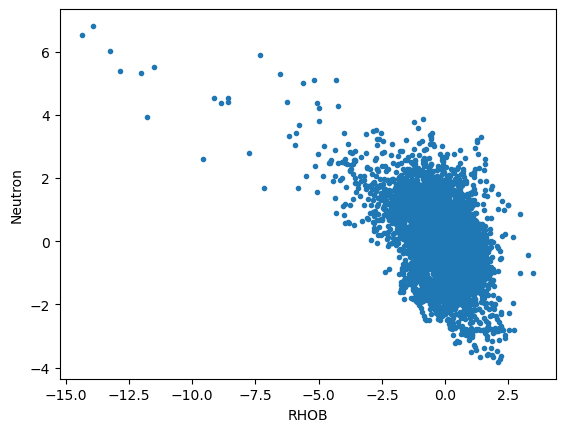

In [66]:
plt.plot(X_scaled, y_scaled,'.')
plt.xlabel('RHOB')
plt.ylabel('Neutron')

## Training / test data splition

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, 
                                                                                y_scaled, 
                                                                                test_size = 0.3, 
                                                                                random_state = 77777)

In [69]:
X_scaled.shape

(8881, 1)

In [70]:
X_scaled_test.shape

(2665, 1)

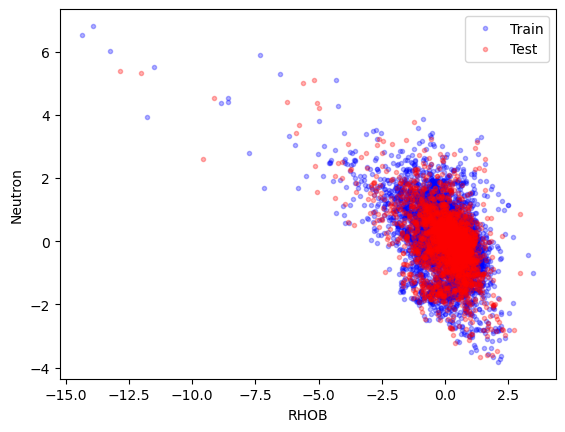

In [72]:
plt.plot(X_scaled_train, y_scaled_train,'b.', alpha = 0.3, label ='Train')
plt.plot(X_scaled_test, y_scaled_test,'r.', alpha = 0.3, label = 'Test')
plt.xlabel('RHOB')
plt.ylabel('Neutron')
plt.legend()

In [68]:
X_scaled_train.shape

(6216, 1)

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [74]:
# instanciation
LR_rho2N = LinearRegression()

In [75]:
# Training/fit to data
LR_rho2N.fit(X_scaled_train, y_scaled_train)

LinearRegression()

In [80]:
X_scaled_train[500]

array([0.04566079])

In [81]:
y_scaled_train[500]

array([-1.74718491])

In [82]:
LR_rho2N.predict(X_scaled_train[500].reshape(-1,1))

array([[-0.0078838]])

In [83]:
y_predict = LR_rho2N.predict(X_scaled_train)

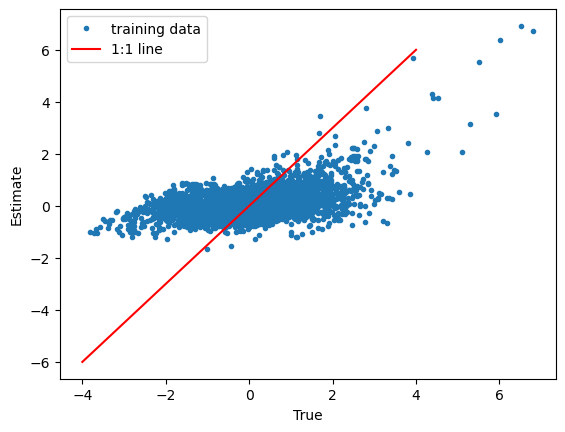

In [87]:
plt.plot(y_scaled_train, y_predict, '.', label = 'training data')
plt.plot([-4,4],[-6,6], '-r', label = '1:1 line')
plt.xlabel('True')
plt.ylabel('Estimate')
plt.legend()


In [91]:
X_dummy = np.array([-15,3]).reshape(-1,1)
y_dummy = LR_rho2N.predict(X_dummpy)

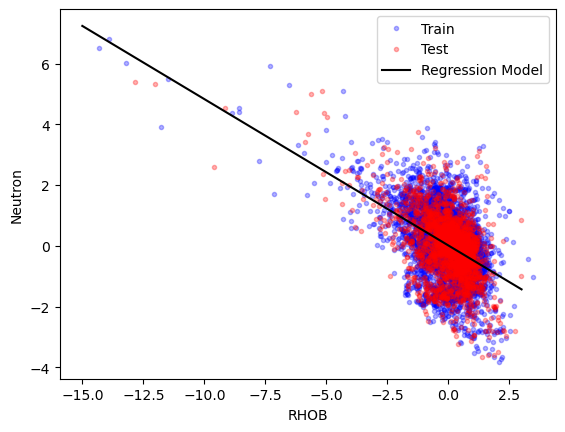

In [92]:
plt.plot(X_scaled_train, y_scaled_train,'b.', alpha = 0.3, label ='Train')
plt.plot(X_scaled_test, y_scaled_test,'r.', alpha = 0.3, label = 'Test')
plt.plot(X_dummy, y_dummy, 'k-', label='Regression Model')
plt.xlabel('RHOB')
plt.ylabel('Neutron')
plt.legend()

## Decision Tree

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [106]:
# instanciation
LR_rho2N = KNeighborsRegressor()

In [109]:
# Training/fit to data
LR_rho2N.fit(X_scaled_train, y_scaled_train)

KNeighborsRegressor()

In [110]:
y_predict = LR_rho2N.predict(X_scaled_train)

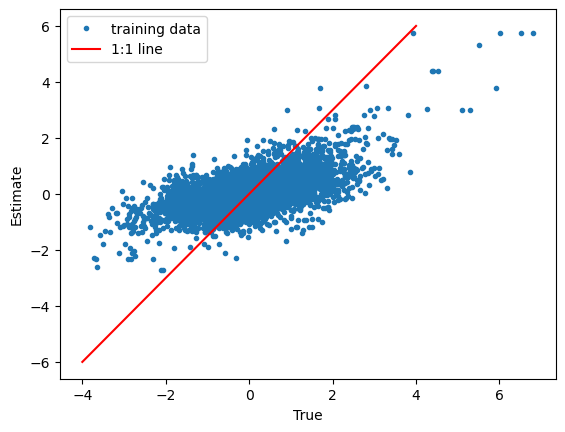

In [111]:
plt.plot(y_scaled_train, y_predict, '.', label = 'training data')
plt.plot([-4,4],[-6,6], '-r', label = '1:1 line')
plt.xlabel('True')
plt.ylabel('Estimate')
plt.legend()
